In [1]:
from math import (cos, sin)
from functools import partial

from levenberg_marquardt import solve

import numpy as np
import matplotlib.pyplot as plt

# Helper Functions

In [2]:
def f(theta: np.ndarray, p_des: np.ndarray, L1: float, L2: float):
    theta_1 = theta[0, 0]
    theta_2 = theta[1, 0]
    p = L1*np.array([[cos(theta_1)],
                            [sin(theta_1)]]) +\
             L2*np.array([[cos(theta_1 + theta_2)],
                            [sin(theta_1 + theta_2)]])
    return p - p_des

In [3]:
def f_jacob(theta, L1, L2):
    theta_1 = theta[0, 0]
    theta_2 = theta[1, 0]
    d_f1_d_theta1 = -L1*sin(theta_1) - L2*sin(theta_1 + theta_2)
    d_f1_d_theta2 = -L2*sin(theta_1 + theta_2)
    d_f2_d_theta1 = L1*cos(theta_1) + L2*cos(theta_1 + theta_2)
    d_f2_d_theta2 = L2*cos(theta_1 + theta_2)
    jacobian = np.array([[d_f1_d_theta1, d_f1_d_theta2],
                           [d_f2_d_theta1, d_f2_d_theta2]])
    return jacobian

# Instatiating Problems

## Endpoint 1

In [4]:
end1 = np.array([[1], [1/2]])
f_to_pass = partial(f, p_des=end1, L1=2, L2=1)
jacob_to_pass = partial(f_jacob, L1=2, L2=1)

In [5]:
x_init = np.zeros((2, 1))
soln, was_solved, soln_traj, costs = solve(x_init, lm0=1,max_iter=100,
                                           f=f_to_pass, Df=jacob_to_pass,
                                           verbose=True)

In [14]:
new_func = partial(f, p_des=end1, L1=2, L2=1)

In [15]:
new_func(x_init)

TypeError: 'list' object cannot be interpreted as an integer

In [6]:
was_solved

False

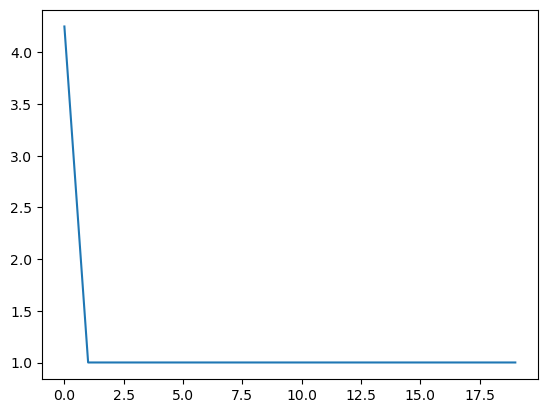

In [8]:
plt.plot(np.arange(20), costs[0:20])
plt.show()